<a href="https://colab.research.google.com/github/Eliecer91/Telecom_X_Parte_2/blob/main/Challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## **📌 Extracción(E - Extract)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
!pip install -U kaleido

In [3]:
df = pd.read_json('https://raw.githubusercontent.com/Eliecer91/Telecom_X_Parte_2/main/TelecomX_Data.json')
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])
datosIniciales=pd.concat([df['customerID'],df['Churn']],axis=1)

## **🔧 Transformación (T - Transform)**

### Transformación de clientes

In [ ]:
cliente.info()

In [ ]:
cliente.head()

In [ ]:
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
cliente.head()

### Transformación de phone

In [ ]:
phone.info()

In [ ]:
phone.head()

In [ ]:
phone['MultipleLines'].unique()

In [ ]:
columnas = ['PhoneService', 'MultipleLines']
phone[columnas] = phone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [ ]:
phone.head()

### Transformación de internet

In [ ]:
internet.info()

In [ ]:
internet.head()

In [ ]:
#internet['OnlineSecurity'].unique()
#internet['OnlineBackup'].unique()
#internet['DeviceProtection'].unique()
#internet['TechSupport'].unique()
#internet['StreamingTV'].unique()
internet['StreamingMovies'].unique()

In [ ]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [ ]:
internet.info()

In [ ]:
internet.head()

### Transformación cuenta

In [ ]:
account.info()

In [ ]:
account.head()

In [ ]:
cantidad_vacios = account['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

In [ ]:
cantidad_nan = account['Charges.Total'].isna().sum()
cantidad_nan

In [ ]:
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [ ]:
account['Charges.Total']

In [ ]:
account.info()

In [ ]:
pd.unique(account['Contract'])

In [ ]:
pd.unique(account['PaperlessBilling'])

In [ ]:
account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [ ]:
pd.unique(account['PaymentMethod'])

In [ ]:
account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.44
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account

### Transformación datos iniciales

In [ ]:
datosIniciales.info()

In [ ]:
datosIniciales.head()

In [ ]:
cantidad_vacios = datosIniciales['Churn'].str.strip().eq('').sum()
cantidad_vacios

In [ ]:
pd.unique(datosIniciales['Churn'])

In [ ]:
datosIniciales['Churn'] = pd.to_numeric(
    datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [ ]:
datosIniciales

## **📊 Carga y análisis(L - Load & Analysis)**

In [ ]:
df_final = pd.concat([datosIniciales,cliente,phone,internet,account], axis=1)

In [ ]:
df_final.describe()

In [ ]:
df_final

In [ ]:
df_final.to_csv('df_final.csv', index=False)

In [ ]:
churn_counts = df_final['Churn'].value_counts()

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_counts.index,y=churn_counts.values,hue=churn_counts.index,palette=["skyblue", "salmon"],legend=False)

plt.title('Distribución de Churn (Abandono de Clientes)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecieron (0)', 'Abandonaron (1)'])

for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

In [ ]:
hombres = df_final[df_final['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_final[df_final['gender'] == 'Female']['Churn'].value_counts()

In [ ]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Genero', fontsize=16)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 3000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(hombres, ax1, 'Hombres')
plot_churn(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()

In [ ]:
no_senior = df_final[df_final['SeniorCitizen'] == 0]['Churn'].value_counts()
senior = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts()

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Edad', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 5000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(no_senior, axs[0], 'No Senior (Edad < 65)')
plot_churn(senior, axs[1], 'Senior (Edad ≥ 65)')

plt.tight_layout()
plt.show()

In [ ]:
df_final['Contract'].unique()

In [ ]:
anio = df_final[df_final['Contract'] == 'One year']['Churn'].value_counts()
mes = df_final[df_final['Contract'] == 'Month-to-month']['Churn'].value_counts()
anios2= df_final[df_final['Contract'] == 'Two year']['Churn'].value_counts()

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Distribución de Churn por Tipo de contrato', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 2500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(mes, axs[0], 'Por mes')
plot_churn(anio, axs[1], 'Por año')
plot_churn(anios2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

In [ ]:
df_final['PaymentMethod'].unique()

In [ ]:
check = df_final[df_final['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
Electronic  = df_final[df_final['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
Credit = df_final[df_final['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
Bank = df_final[df_final['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Distribución de Churn por Método de pago', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(check, axs[0][1], 'Mailed check')
plot_churn(Electronic, axs[1][0], 'Electronic check')
plot_churn(Credit, axs[0][0], 'Credit card (automatic)')
plot_churn(Bank, axs[1][1], 'Bank transfer (automatic)')


plt.tight_layout()
plt.show()

In [ ]:
TotalGastado1 = df_final[df_final['Churn'] == 1]['Charges.Total']
TotalGastado0 = df_final[df_final['Churn'] == 0]['Charges.Total']
tiempoDeContrato0 = df_final[df_final['Churn'] == 0]['tenure']
tiempoDeContrato1 = df_final[df_final['Churn'] == 1]['tenure']

In [ ]:
print("--- Total Gastado (Churn = 1) ---")
print(TotalGastado1.describe())
print("\n--- Total Gastado (Churn = 0) ---")
print(TotalGastado0.describe())

print("\n--- Tiempo de Contrato (Churn = 1) ---")
print(tiempoDeContrato1.describe())
print("\n--- Tiempo de Contrato (Churn = 0) ---")
print(tiempoDeContrato0.describe())

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color='skyblue', label='No Churn', kde=True)
sns.histplot(TotalGastado1, color='salmon', label='Churn', kde=True)
plt.title('Distribución de Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color='skyblue', label='No Churn', kde=True)
sns.histplot(tiempoDeContrato1, color='salmon', label='Churn', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_final, palette={'0': 'skyblue', '1': 'salmon'})
plt.title('Box Plot de Total Gastado por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_final, palette={'0': 'skyblue', '1': 'salmon'})
plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()

## Informe final

### **Informe de Análisis de Churn de Clientes - Telecom X**


🔹 **Introducción**

En mi rol como asistente de análisis de datos en Telecom X, me he propuesto entender a profundidad un problema que hoy preocupa bastante a la empresa: la evasión de clientes.
Actualmente, muchas personas están cancelando sus servicios, y eso no solo afecta los ingresos, sino también las posibilidades de crecimiento de la compañía.

Para poder enfrentar este reto, necesitamos ir más allá de las cifras y descubrir qué hay detrás de la decisión de los clientes de marcharse.
Este informe mostrará el camino que seguimos, desde la recolección de los datos hasta la identificación de hallazgos que realmente puedan traducirse en acciones concretas.

La idea es que estos resultados se conviertan en la base para que el equipo de Data Science pueda construir modelos predictivos más precisos y, con ello, ayudar a que la empresa diseñe estrategias efectivas para disminuir la tasa de abandono.

🔹 **Limpieza y Tratamiento de Datos**

La preparación de los datos fue un paso clave para garantizar que la información realmente tuviera calidad y pudiera ser útil en el análisis. Al inicio, se trabajó con un archivo en formato JSON, el cual necesitaba ser normalizado. Gracias a este proceso, fue posible dividir su contenido en cinco DataFrames, lo que permitió revisar cada uno de ellos de manera más detallada y enfocada.

Los pasos de limpieza y transformación incluyeron:


* **Normalización de Valores Categóricos**: En varios de los DataFrames fue necesario transformar las respuestas binarias de "Yes" y "No" a valores numéricos, asignándoles 1 y 0 respectivamente. Esta conversión no solo simplifica el análisis cuantitativo, sino que también prepara los datos para ser utilizados en modelos predictivos de manera más eficiente.


* **Manejo de Valores Faltantes y Conversión de Tipo en 'Charges.Total'**: El DataFrame de cuentas presentó un reto especial con la columna Charges.Total. Aunque no había valores nulos explícitos (NaN), sí se encontraron cadenas vacías que bloqueaban la posibilidad de hacer operaciones numéricas. Para resolverlo, esas cadenas vacías se reemplazaron por 0 y luego la columna se convirtió a un tipo de dato numérico, lo que permitió trabajar con ella sin problemas en los cálculos posteriores.

* **Creación de Nuevas Variables**: Se creó una nueva columna llamada cuentas_diarias, calculada a partir de la columna cargos_mensuales. Para ello, se dividió el valor mensual entre el promedio de días de un mes (≈30.44 días) y luego se redondeó el resultado a dos decimales. Esta métrica permite tener una visión más clara del gasto diario de cada cliente.

* **Consolidación de Datos**: Finalmente, todos los DataFrames tratados y transformados fueron unidos en un único DataFrame consolidado (df_final). Esta unificación es crucial para un análisis holístico y para evitar interacciones y uniones complejas en etapas posteriores del análisis.

🔹 **Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio nos permitió identificar patrones y tendencias significativas en los datos, proporcionando una comprensión profunda de los factores asociados al churn.

1. **Visión General del Churn:**

Nuestro estudio inicial reveló que, de la base total de clientes, 5398 personas permanecieron con la empresa, mientras que 1869 clientes decidieron cancelar sus servicios (churn). Esta proporción de abandono es significativa y justifica una investigación más profunda sobre los factores que lo influyen.

2. **Factores Categóricos y su Relación con el Churn:**

**Género**:

Se observó que las mujeres presentan un número absoluto de abandonos mayor que los hombres, con una diferencia de aproximadamente 9 puntos porcentuales. Aunque esta es una tendencia, su impacto relativo podría ser menor comparado con otros factores.

**Seniority**:

No Senior: Este segmento tiene un mayor riesgo de abandono, a pesar de que también representa una mayor cantidad de clientes que permanecen en general.
Senior: Un número considerable de clientes seniors (706) permanecieron, mientras que 476 abandonaron.

**Contrato**

El contrato a dos años muestra consistentemente el menor riesgo de abandono, lo que sugiere un mayor compromiso y lealtad por parte de estos clientes.
En contraste, el contrato mensual (de por mes) presenta el mayor riesgo de abandono. A pesar de este alto riesgo, este tipo de contrato es el más popular, albergando la mayor cantidad de usuarios.

**Método de pago**

El cheque electrónico aparece como el método de pago con la mayor cantidad de abandonos, alcanzando la cifra de 1.071 clientes. Este hallazgo lo convierte en un foco prioritario para diseñar estrategias de retención.

En contraste, los clientes que pagan con tarjeta de crédito (crédito bancario) muestran el menor riesgo de abandono, lo que sugiere que este grupo mantiene una relación más estable con la compañía.

3. **Análisis de Variables Numéricas: Total Gastado y Tiempo de Contrato (Tenure)**:

Para entender mejor la distribución de estas variables entre los grupos de churn y no churn, utilizamos estadísticas descriptivas y visualizaciones (histogramas y box plots).

**Total Gastado (Charges.Total):**

Estadísticas Descriptivas:

--- Total Gastado (Churn = 1) ---
count    1869.000000

mean     1531.796094

std      1890.822994

min        18.850000

25%       134.500000

50%       703.550000

75%      2331.300000

max      8684.800000


--- Total Gastado (Churn = 0) ---
count    5398.000000

mean     2535.263977

std      2330.802193

min         0.000000

25%       564.362500

50%      1663.625000

75%      4237.275000

max      8672.450000

**Observaciones:** Los clientes que cancelaron (Churn = 1) tienen un gasto total promedio significativamente más bajo (1531.80) y una mediana mucho menor (703.55), en comparación con los clientes que no cancelaron (promedio de $2535.26 y mediana de 1663.63). El 75% de los clientes que abandonaron gastó menos de 2331.30, un valor que es incluso inferior al 75% del gasto de los clientes que permanecieron.

**Visualización (Histograma):**

El histograma muestra una clara concentración de clientes que cancelan en los rangos de menor gasto, con una curva de densidad ("kde") que alcanza su pico en valores muy bajos. Los clientes que no cancelan tienen una distribución más extendida y con picos hacia valores de gasto más altos.
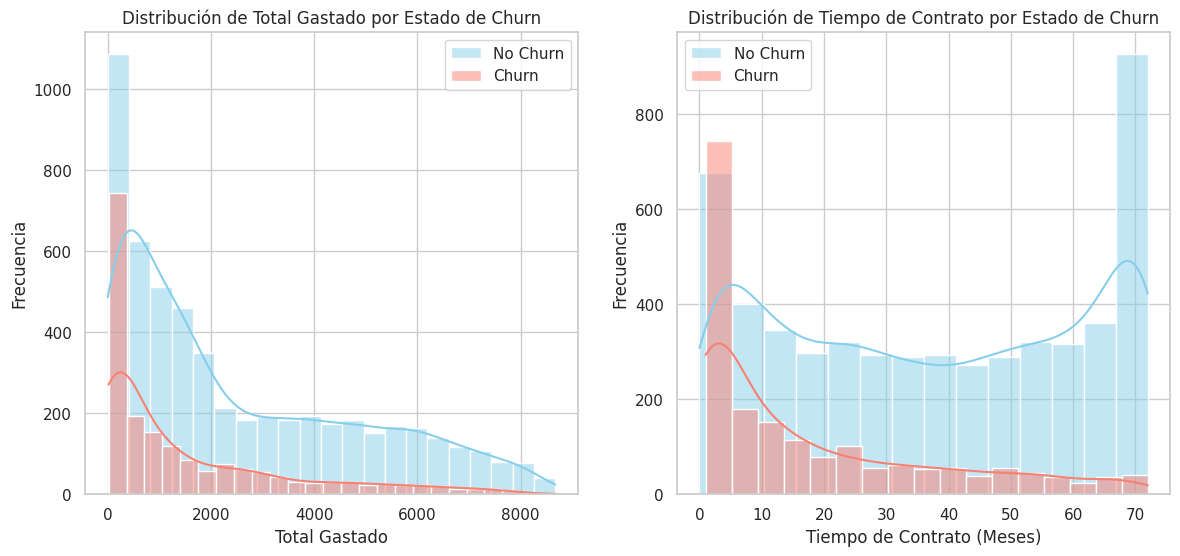
**Visualización (Box Plot):**

El box plot refuerza que la caja (que representa el 50% central de los datos) y la mediana para los clientes que cancelan están ubicadas en un rango de valores mucho más bajo que para los que no cancelan. Hay una presencia notable de outliers de alto gasto en el grupo de churn, pero la mayoría se concentra en el rango inferior.

**Tiempo de Contrato (Tenure):**

Estadísticas Descriptivas:

--- Tiempo de Contrato (Churn = 1) ---
count    1869.000000

mean       17.979133

std        19.531123

min         1.000000

25%         2.000000

50%        10.000000

75%        29.000000

max        72.000000

Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---

count    5398.000000

mean       37.321045

std        24.178367

min         0.000000

25%        14.000000

50%        37.000000

75%        61.000000

max        72.000000

Name: tenure, dtype: float64

Observaciones: Los clientes que cancelaron presentan un tiempo de contrato promedio mucho más corto (17.98 meses) y una mediana de solo 10 meses, mientras que los que no cancelaron tienen un promedio de 37.32 meses y una mediana de 37 meses. El 75% de los clientes que hicieron churn lo hicieron antes de los 29 meses, lo cual está muy por debajo de la mediana (50%) de los clientes que no abandonaron.

**Visualización (Histograma):**

El histograma para el tiempo de contrato muestra una marcada concentración de churn en los primeros meses, con un pico pronunciado en el inicio de la distribución para los clientes que cancelan. Los clientes que permanecen tienen una distribución más uniforme, con un aumento en la frecuencia hacia los contratos más largos.

**Visualización (Box Plot):**

El box plot de tenure destaca que la mediana del tiempo de contrato para los clientes que cancelan es extremadamente baja, y su caja completa se encuentra dentro del primer cuartil de los clientes que no cancelan. Esto subraya que la mayoría de los clientes que abandonan lo hacen muy temprano en su relación con la empresa.

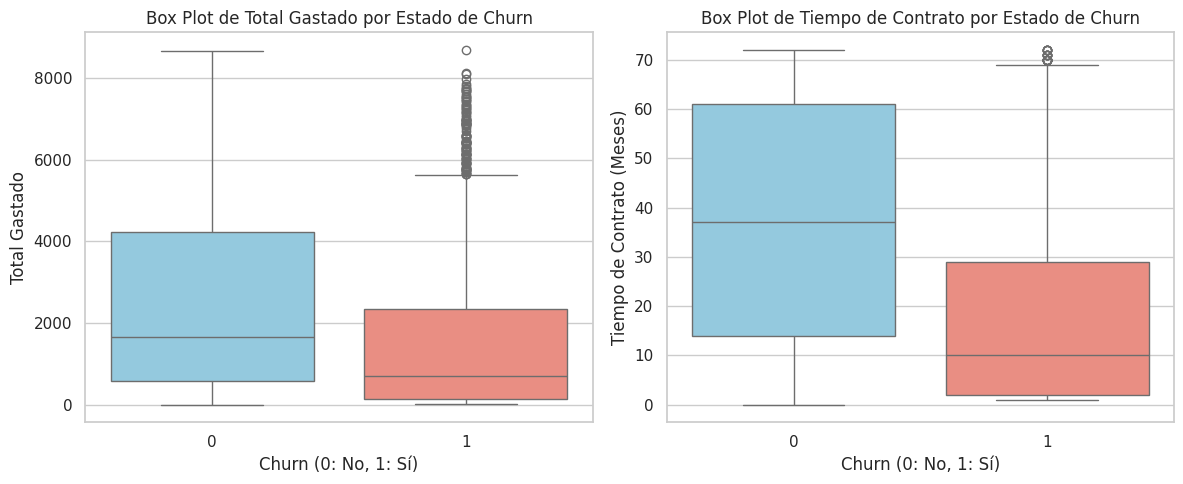

🔹 **Conclusiones e Insights**

Nuestro análisis exploratorio ha revelado un perfil claro del cliente propenso al churn y los factores que lo impulsan:

1.  **Clientes de Alto Riesgo:** Los clientes con mayor riesgo de abandono suelen ser aquellos con contratos mensuales, que utilizan cheques electrónicos como método de pago, que son no seniors, y, crucialmente, aquellos que han tenido un tiempo de contrato más corto y un gasto total acumulado más bajo.

2.  **Importancia de los Primeros Meses:** El tiempo de contrato es un indicador crítico. Una gran proporción de clientes que cancelan lo hacen en los primeros 10-20 meses, lo que sugiere que la experiencia inicial del cliente es fundamental.

3.  **Valor del Cliente y Churn:** Los clientes que generan un menor gasto total son significativamente más propensos a abandonar. Esto implica que la inversión o el valor percibido del servicio puede ser bajo para ellos.

4.  **Métodos de Pago y Lealtad:** El método de pago no solo es una preferencia, sino un indicador de riesgo. Los usuarios de cheque electrónico muestran una preocupante tasa de churn, a diferencia de los usuarios de tarjeta de crédito, que parecen más estables.

5.  **Contratos a Largo Plazo como Ancla:** Los contratos de dos años actúan como un fuerte ancla, reduciendo drásticamente la probabilidad de churn, lo que valida la importancia de incentivar la permanencia a largo plazo.

Estos hallazgos proporcionan una base sólida para que el equipo de Data Science pueda avanzar en la creación de modelos predictivos de churn y, a la empresa, en el desarrollo de estrategias de retención más dirigidas y efectivas.

🔹 **Recomendaciones**

Basado en el análisis de datos, se proponen las siguientes recomendaciones estratégicas para Telecom X con el fin de reducir la tasa de evasión de clientes:

**Foco en la Experiencia del Cliente Nuevo (Primeros Meses):**

Estrategia: Implementar un programa de "Onboarding" proactivo y robusto para los clientes nuevos, especialmente en los primeros 3 a 6 meses.

Acciones:Seguimiento personalizado (llamadas, emails) para asegurar que el cliente esté satisfecho con el servicio y resolver cualquier duda o problema rápidamente.

Ofrecer tutoriales o guías de uso del servicio.
Promociones o beneficios exclusivos para los primeros meses que incentiven el uso y la permanencia.

**Incentivar Contratos a Largo Plazo:**

Estrategia: Reducir la proporción de clientes con contratos mensuales y migrar a contratos de mayor duración.

Acciones: Ofrecer descuentos significativos o beneficios adicionales (ej. mayor velocidad, servicios premium) a los clientes que opten por contratos de 1 o 2 años.

Comunicar claramente los beneficios económicos y de servicio de los contratos a largo plazo.

**Análisis y Gestión del Método de Pago (Cheque Electrónico):**

Estrategia: Investigar las razones detrás del alto churn asociado al cheque electrónico y promover métodos de pago más estables.

Acciones: Realizar encuestas o análisis cualitativos con clientes que usen cheque electrónico para entender puntos de fricción o insatisfacción.

Ofrecer incentivos para cambiar a domiciliación bancaria o tarjeta de crédito (ej. pequeños descuentos, bonificaciones).

Mejorar la experiencia de pago o comunicación para usuarios de cheque electrónico.

**Programas de Retención para Clientes de Bajo Gasto y No Seniors:**

Estrategia: Diseñar ofertas y comunicaciones específicas para clientes que muestran bajo gasto o que pertenecen al segmento "no senior".

Acciones: Identificar proactivamente a los clientes con bajo gasto y ofrecerles paquetes de servicios más adecuados a sus necesidades o promociones para aumentar su valor.

Desarrollar campañas de marketing dirigidas a clientes no seniors, destacando beneficios relevantes para su perfil.

**Desarrollo de Modelos Predictivos:**

Estrategia: Utilizar los insights extraídos para construir y refinar modelos de aprendizaje automático capaces de predecir la probabilidad de churn.

Acciones: Integrar las variables Total Gastado y Tiempo de Contrato, junto con el tipo de contrato y método de pago, como características clave en los modelos.

Establecer umbrales de riesgo para identificar clientes con alta probabilidad de churn antes de que ocurra.
